# Question 3

In [78]:
import numpy as np
import numpy.matlib
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
d = 6
def covar(x1,n,Mu):
    Y = np.mat(np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],
                         [0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]))
    for i in range(n):
        xs = np.matrix(x1[0:,i]).T
        xn1 = xs - Mu
        X = np.mat((xn1))
        Y = Y + X*(X.T)
    return Y/(n-1) 

In [80]:
def error(a,b,m0,s0,m1,s1):
    a =  np.matrix(a)
    b = np.matrix(b)
    u0 = np.matrix(m0).T
    s0 = np.matrix(s0)
    x1n = np.array(np.matmul(a.T, u0) + b)
    x1d = np.sqrt(np.array(np.matmul(np.matmul(a.T,s0),a)))
    x1err = x1n/x1d

    u1 = np.matrix(m1).T
    s1 = np.matrix(s1)
    x2n = np.array(np.matmul(a.T, u1) + b)
    x2d = np.sqrt(np.array(np.matmul(np.matmul(a.T,s1),a)))
    x2err = -x2n/x2d 
    
    err = (norm.cdf(x1err) + norm.cdf(x2err))*0.5
    return err

In [81]:
def LDA(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd):
    cov1 = covar(x1,n11,Mu1)
    cov2 = covar(x2,n22,Mu2)
    cov = 0.5*(cov1+cov2)
    cov = np.array(cov)
    Msigma = np.matrix(cov)
    Inv_Msigma = np.linalg.inv(Msigma)
    a = (Inv_Msigma*Mdiff)
    a = a.tolist()
    b = -Mdiff.T*Inv_Msigma*Madd
    b = b.tolist()
    b = b[0][0]
    return a,b

def NMC(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd):
    a = Mu2 - Mu1
    a = a.tolist()
    b = -Mdiff.T*Madd
    b = b.tolist()
    b = b[0][0]
    return a,b

def DLDA(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd):
    cov1 = covar(x1,n11,Mu1)
    cov2 = covar(x2,n22,Mu2)
    cov = 0.5*(cov1+cov2)
    cov = np.array(cov)
    covd = [[cov[0][0],0,0,0,0,0],
            [0,cov[1][1],0,0,0,0],
            [0,0,cov[2][2],0,0,0],
            [0,0,0,cov[3][3],0,0],
            [0,0,0,0,cov[4][4],0],
            [0,0,0,0,0,cov[5][5]]]

    Msigma = np.matrix(covd)
    Inv_Msigma = np.linalg.inv(Msigma)
    a = Inv_Msigma*Mdiff
    a = a.tolist()
    b = -Mdiff.T*Inv_Msigma*Madd
    b = b.tolist()
    b = b[0][0]
    return a,b

In [82]:
gcovM1 = [[1,0,0,0,0,0],
          [0,1,0,0,0,0],
          [0,0,1,0,0,0],
          [0,0,0,1,0,0],
          [0,0,0,0,1,0],
          [0,0,0,0,0,1]]
gcovM2 = [[1,0.2,0,0,0,0],
          [0.2,1,0,0,0,0],
          [0,0,1,0.2,0,0],
          [0,0,0.2,1,0,0],
          [0,0,0,0,1,0.2],
          [0,0,0,0,0.2,1]]
gcovM3 = [[1,0.2,0.2,0,0,0],
          [0.2,1,0.2,0,0,0],
          [0.2,0.2,1,0,0,0],
          [0,0,0,1,0.2,0.2],
          [0,0,0,0.2,1,0.2],
          [0,0,0,0.2,0.2,1]]


def avg_err(gcov,n11,n22):
    errorMl = []
    errorMd = []
    errorMn = []
    for i in range(100):
        mean1 = [0,0,0,0,0,0]
        mean2 = [1,1,1,1,1,1] 
        x1 = np.random.multivariate_normal(mean1, gcov, n11).T
        x2 = np.random.multivariate_normal(mean2, gcov, n22).T

        Mu1 = np.matrix([[np.mean(x1.T[0:,0])],[np.mean(x1.T[0:,1])],[np.mean(x1.T[0:,2])],
                          [np.mean(x1.T[0:,3])],[np.mean(x1.T[0:,4])],[np.mean(x1.T[0:,5])]])
        Mu1 = Mu1/6
        Mu2 = np.matrix([[np.mean(x2.T[0:,0])],[np.mean(x2.T[0:,1])],[np.mean(x2.T[0:,2])],
                          [np.mean(x2.T[0:,3])],[np.mean(x2.T[0:,4])],[np.mean(x2.T[0:,5])]])
        Mu2 = Mu2/6
        Mdiff = Mu2 - Mu1
        Madd = 0.5*(Mu1+Mu2)

        al,bl = LDA(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd)
        errorMl.append(error(al,bl,mean1,gcov,mean2,gcov))

        ad,bd = DLDA(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd)
        errorMd.append(error(ad,bd,mean1,gcov,mean2,gcov))

        an,bn = NMC(x1,x2,Mu1,Mu2,n11,n22,Mdiff,Madd)
        errorMn.append(error(an,bn,mean1,gcov,mean2,gcov))
    return np.average(errorMl),np.average(errorMd),np.average(errorMn)


## Model 1

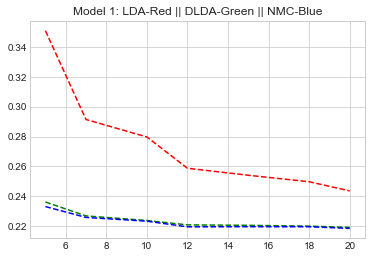

Error of LDA is [0.35069512056486035, 0.2913831966508251, 0.2797158333417899, 0.2587964530505531, 0.25412632160325305, 0.24978923448612927, 0.24366412266302573]
Error of DLDA is [0.23627496561849543, 0.22695445440094464, 0.2238902443900544, 0.2209599396917379, 0.22066564393849325, 0.2201357105952325, 0.21926004839593666]
Error of NMC is [0.23320495771434657, 0.225943129242763, 0.2234380558573823, 0.21966161067093065, 0.21975453695292413, 0.21971137388824405, 0.21860238343011154]


In [83]:
n1 = 5,7,10,12,15,18,20
n2 = 5,8,10,13,15,17,20
eM1l = []
eM1d = []
eM1n = []
for ni in range(len(n1)):
    e = avg_err(gcovM1,n1[ni],n2[ni])
    eM1l.append(e[0])
    eM1d.append(e[1])
    eM1n.append(e[2])
    

fig = plt.figure()
ax = plt.axes()
ax.plot(n1, eM1l,'r--',n1 , eM1d,'g--',n1, eM1n ,'b--');
plt.style.use('seaborn-whitegrid')
plt.title('Model 1: LDA-Red || DLDA-Green || NMC-Blue', fontdict=None, loc='center', pad=None)
plt.show()
print('Error of LDA is',  eM1l)
print('Error of DLDA is', eM1d)
print('Error of NMC is',  eM1n)

## Model 2

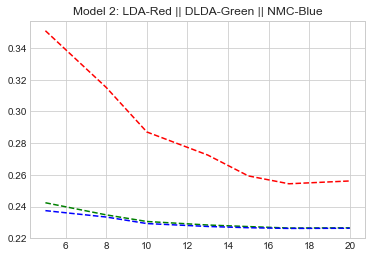

Error of LDA is [0.3509230968970119, 0.3151098670969939, 0.28704659686441064, 0.27248780176594956, 0.2593265558056644, 0.2543631319824413, 0.25614644579940316]
Error of DLDA is [0.24239271121864644, 0.23474145013328993, 0.23057238605589664, 0.2283509507510529, 0.22736312636655007, 0.22643452677658238, 0.22656082955648946]
Error of NMC is [0.23741963163258098, 0.23338304930308226, 0.22927096364697808, 0.22742711596490792, 0.226645539411, 0.2262018287670765, 0.2263059187575682]


In [84]:
eM2l = []
eM2d = []
eM2n = []
for ni in range(len(n1)):
    e = avg_err(gcovM2,n1[ni],n2[ni])
    eM2l.append(e[0])
    eM2d.append(e[1])
    eM2n.append(e[2])
    

fig = plt.figure()
ax = plt.axes()
ax.plot(n2, eM2l,'r--', n2 , eM2d,'g--',n2 , eM2n ,'b--');
plt.style.use('seaborn-whitegrid')
plt.title('Model 2: LDA-Red || DLDA-Green || NMC-Blue', fontdict=None, loc='center', pad=None)
plt.show()
print('Error of LDA is',  eM2l)
print('Error of DLDA is', eM2d)
print('Error of NMC is',  eM2n)

## Model 3

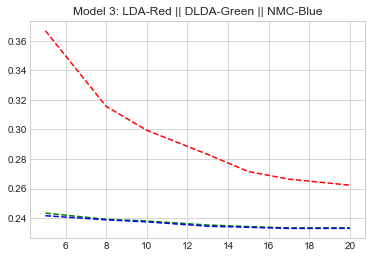

Error of LDA is [0.3668598332267766, 0.3155647864641221, 0.299438742250547, 0.28310377362429706, 0.27150863564869465, 0.26633544523881003, 0.26229818228911944]
Error of DLDA is [0.24335789867301025, 0.2391659645231434, 0.23800338990264933, 0.23529819718091818, 0.23423709624982147, 0.2333313660824582, 0.2333727600127646]
Error of NMC is [0.24159250284690936, 0.23880141280558626, 0.23743263490002575, 0.23449881863632738, 0.2337518617146092, 0.232998469080432, 0.23305183541903995]


In [85]:
eM3l = []
eM3d = []
eM3n = []
for ni in range(len(n1)):
    e = avg_err(gcovM3,n1[ni],n2[ni])
    eM3l.append(e[0])
    eM3d.append(e[1])
    eM3n.append(e[2])
    

fig = plt.figure()
ax = plt.axes()
ax.plot(n2, eM3l,'r--', n2 , eM3d,'g--',n2 , eM3n ,'b--');
plt.style.use('seaborn-whitegrid')
plt.title('Model 3: LDA-Red || DLDA-Green || NMC-Blue', fontdict=None, loc='center', pad=None)
plt.show()
print('Error of LDA is',  eM3l)
print('Error of DLDA is', eM3d)
print('Error of NMC is',  eM3n)

### Interpretations: In all the cases the error reduces with the increase in number of sample size.